In [1]:
# import libraries

import pandas as pd
import numpy as np

In [2]:
# read the data
original_data =pd.read_csv(
    "applicant.csv",
    names=[
        "Age","Workclass","fnlwgt","Education","Education-Num","Marital Status",
        "Occupation","Relationship","Race","Gender","Capital Gain","Capital Loss",
        "Hours per week","Country","Target"],
    sep=r'\s*,\s*',
    engine='python',
    na_values='?')
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
original_data.shape

(32561, 15)

In [4]:
# plot the graph
import matplotlib.pyplot as plt
import math
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

In [5]:
fig = plt.figure(figsize=(18,18))
cols=3
rows=math.ceil(float(original_data.shape[1]/cols))

<Figure size 1296x1296 with 0 Axes>

C:\Users\EBEN-SUCCESS\AppData\Local\Temp\ipykernel_7444\828024146.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if original_data.dtypes[column] ==np.object:


ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

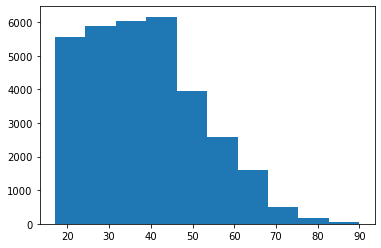

In [6]:
for i,column in enumerate(['Age','Workclass','Education','Occupation','Race','Gender']):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if original_data.dtypes[column] ==np.object: 
        original_data[column].value_counts().plot(kind="bar",axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [7]:
#show the graph
original_data.groupby('Education-Num').Target.mean().plot(kind='bar')
plt.show()

TypeError: Could not convert <=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K<=50K to numeric

In [ ]:
#train test data
from sklearn.model_selection import train_test_split
X=original_data[['Education-Num','Occupation']]
Y=original_data['Target']
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
#train the model using SVM classifier (SVC)
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)